In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

TASK 1

petal.length    0
variety         0
dtype: int64


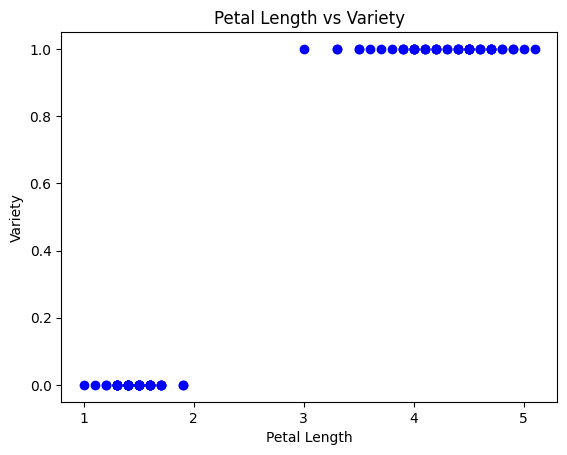

In [2]:
#data import
data = pd.read_csv('iris_binary.csv')

# Since length is enough to distinguish the variety, we truncate the data to only have length and its associated variety
data = data[['petal.length', 'variety']]

# Map 'variety' to 0 and 1
data['variety'] = data['variety'].map({'Setosa': 0, 'Versicolor': 1})

# Check missing values
print(data.isnull().sum())

# Visualize the data
plt.scatter(data['petal.length'], data['variety'], color='blue', marker='o')
plt.xlabel('Petal Length')
plt.ylabel('Variety')
plt.title('Petal Length vs Variety')
plt.savefig('plots/binary/petal_length_vs_variety.png')
plt.show()


In [3]:
# loss function
def loss_function(m, b, data):
    total_error = 0
    n = len(data)
    for i in range(n):
        x = data.iloc[i]['petal.length']
        y = data.iloc[i]['variety']
        total_error += (y - (m * x + b)) ** 2
    return total_error / n

# gradient descent
def gradient_descent(m_now, b_now, data, learning_rate):
    m_gradient = 0
    b_gradient = 0
    n = len(data)
    for i in range(n):
        x = data.iloc[i]['petal.length']
        y = data.iloc[i]['variety']
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
    m_next = m_now - learning_rate * m_gradient
    b_next = b_now - learning_rate * b_gradient
    return m_next, b_next


Epoch 0, Loss: 0.20171596311999992
Epoch 50, Loss: 0.03981410232039751
Epoch 100, Loss: 0.026558435166207997
Epoch 150, Loss: 0.02032162846260265
Epoch 200, Loss: 0.01738720370633207
Epoch 250, Loss: 0.01600655346985191
Final good parameters: m = 0.32101304842875195, b = -0.4083272435700904


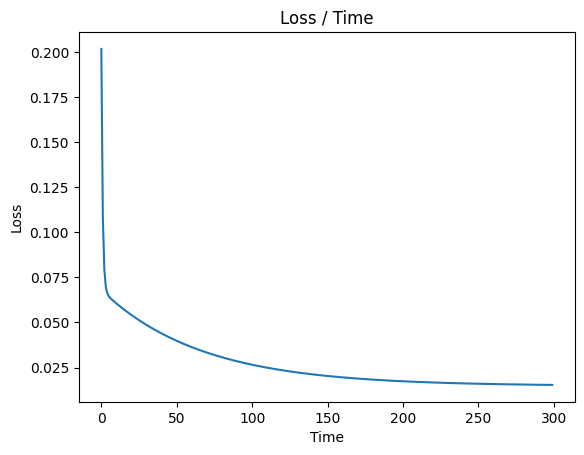

In [4]:
#start training

# Initialize parameters
m = 0
b = 0
learning_rate = 0.02
epochs = 300

loss_history = []

# Now we do gradient descent for however many epochs
for epoch in range(epochs):
    m, b = gradient_descent(m, b, data, learning_rate)
    loss = loss_function(m, b, data)
    loss_history.append(loss)
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

print(f'Final good parameters: m = {m}, b = {b}')

# Plot loss history to see how small the lost function got over time
plt.figure()
plt.plot(range(epochs), loss_history)
plt.xlabel('Time')
plt.ylabel('Loss')
plt.title('Loss / Time')
plt.savefig('plots/binary/loss_over_epochs.png')
plt.show()

In [5]:
# Make predictions
def predict(m, b, x):
    return m * x + b

data['predicted'] = data['petal.length'].apply(lambda x: predict(m, b, x))

# Apply threshold to classify
def apply_threshold(y_pred, threshold=0.5):
    return [1 if y >= threshold else 0 for y in y_pred]

data['predicted_class'] = apply_threshold(data['predicted'])

# Evaluate the model
y_true = data['variety']
y_pred = data['predicted_class']

accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 50]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



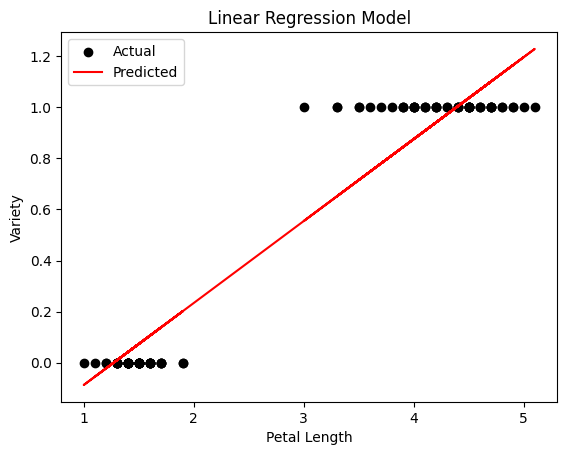

In [6]:
# Plot the results
plt.figure()
plt.scatter(data['petal.length'], data['variety'], color='black', label='Actual')
plt.plot(data['petal.length'], data['predicted'], color='red', label='Predicted')
plt.xlabel('Petal Length')
plt.ylabel('Variety')
plt.title('Linear Regression Model')
plt.legend()
plt.savefig('plots/binary/linear_regression_model.png')
# plt.show()


TASK 2

petal.length    0
petal.width     0
variety         0
dtype: int64
petal.length    0
petal.width     0
variety         0
dtype: int64
petal.length    0
petal.width     0
variety         0
dtype: int64


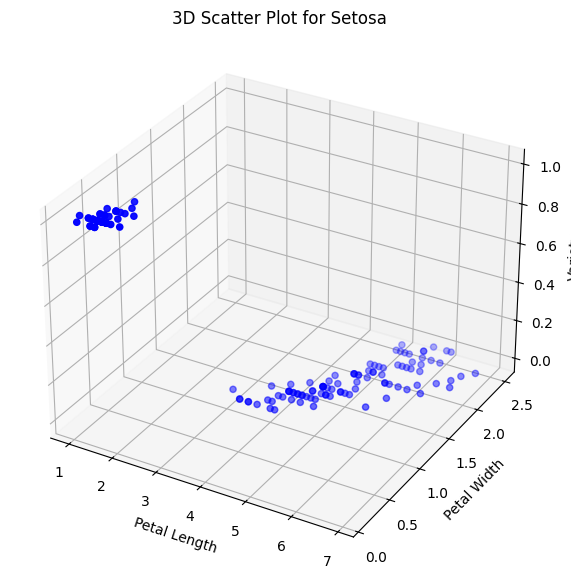

<Figure size 640x480 with 0 Axes>

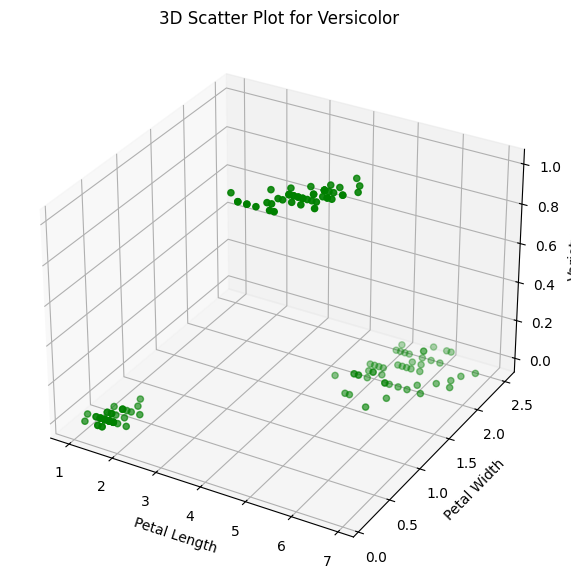

<Figure size 640x480 with 0 Axes>

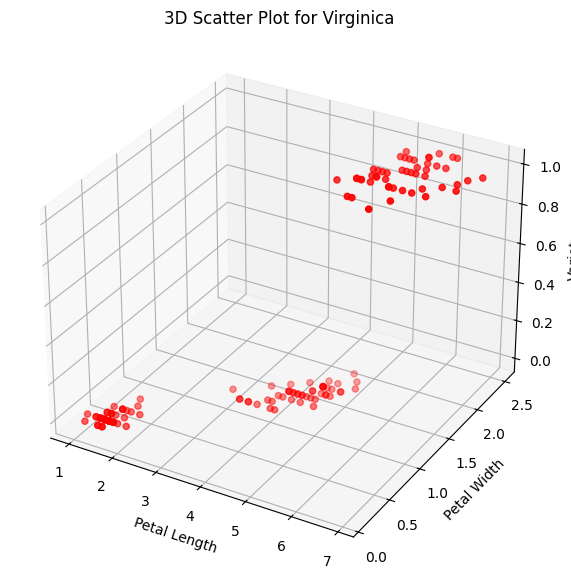

<Figure size 640x480 with 0 Axes>

In [15]:
#data processing
data = pd.read_csv('iris.csv')

# Since length is enough to distinguish the variety, we truncate the data to only have length and its associated variety
data = data[['petal.length','petal.width', 'variety']]
data_Setosa = data.copy()
data_Versicolor = data.copy()
data_Virginica = data.copy()
# Map 'variety' to 0 and 1
data_Setosa['variety'] = data['variety'].map({'Setosa': 1, 'Versicolor': 0, 'Virginica': 0})
data_Versicolor['variety'] = data['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 0})
data_Virginica['variety'] = data['variety'].map({'Setosa': 0, 'Versicolor': 0, 'Virginica': 1})
# Check missing values
print(data_Setosa.isnull().sum())
print(data_Versicolor.isnull().sum())
print(data_Versicolor.isnull().sum())
# Visualize the data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建 3D 图像的绘制函数
def plot_3d_scatter(data, title, color):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data['petal.length'], data['petal.width'], data['variety'], color=color, marker='o')

    # 设置轴标签和标题
    ax.set_xlabel('Petal Length')
    ax.set_ylabel('Petal Width')
    ax.set_zlabel('Variety')
    ax.set_title(title)

    # 显示图像
    plt.show()
    plt.savefig(f'plots/3d_scatter_{title.lower().replace(" ", "_")}.png')

# 可视化 Setosa
plot_3d_scatter(data_Setosa, '3D Scatter Plot for Setosa', color='blue')

# 可视化 Versicolor
plot_3d_scatter(data_Versicolor, '3D Scatter Plot for Versicolor', color='green')

# 可视化 Virginica
plot_3d_scatter(data_Virginica, '3D Scatter Plot for Virginica', color='red')

In [8]:
data_Setosa

,petal.length,petal.width,variety
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [9]:
def binary_classifier_plots(file='iris_binary.csv'):
    data = pd.read_csv(file, sep=',')
    print(data.head())  # Display first few rows
    # Check for missing values
    # print(data.isnull().sum())
    # Plotting pairwise relationships
    sns.pairplot(data, hue='variety', markers=["o", "s"])
    plt.savefig('plots/binary/pairplot.png')  # Save the plot

def load_data(file='iris_binary.csv'):
    # Load the data
    data = pd.read_csv(file)
    # Display the first few rows
    print(data.head())
    # Map the 'variety' column to binary labels
    data['variety'] = data['variety'].map({'Setosa': 0, 'Versicolor': 1})
    # Check for missing values
    print(data.isnull().sum())
    return data

def split_features_target(data):
    # Features - all columns except 'variety'
    X = data.drop('variety', axis=1)
    # Target variable
    y = data['variety']
    return X, y

def split_train_test(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    # Add a column of ones to include the bias (intercept) term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    # Initialize weights randomly
    theta = np.random.randn(X_b.shape[1], 1)
    m = len(X_b)
    for epoch in range(epochs):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y.values.reshape(-1,1))
        theta = theta - learning_rate * gradients
        #  print cost every 100 epochs, we see it going down
        if epoch % 100 == 0:
            cost = (1/m) * np.sum((X_b.dot(theta) - y.values.reshape(-1,1)) ** 2)
            print(f"Epoch {epoch}, Cost: {cost}")
    return theta

def predict_manual(X, theta):
    # Add bias term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    y_pred_continuous = X_b.dot(theta)
    return y_pred_continuous

def apply_threshold(y_pred_continuous, threshold=0.5):
    y_pred_class = (y_pred_continuous >= threshold).astype(int)
    return y_pred_class

def evaluate_model(y_test, y_pred_class):
    accuracy = accuracy_score(y_test, y_pred_class)
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    class_report = classification_report(y_test, y_pred_class)
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

def main():
    # Optional: Generate plots
    binary_classifier_plots()

    # Step 1: Load and preprocess the data
    data = load_data()

    # Step 2: Split features and target
    X, y = split_features_target(data)

    # Step 3: Split into training and testing sets
    X_train, X_test, y_train, y_test = split_train_test(X, y)

    # Step 4: Train the model using gradient descent
    theta = gradient_descent(X_train, y_train)

    # Step 5: Make predictions on the test set
    y_pred_continuous = predict_manual(X_test, theta)

    # Step 6: Apply the decision threshold to get back the class labels
    y_pred_class = apply_threshold(y_pred_continuous)

    # Step 7: Evaluate the model
    evaluate_model(y_test, y_pred_class)


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64
Epoch 0, Cost: 0.3684661844652247
Epoch 100, Cost: 0.056049093233037584
Epoch 200, Cost: 0.04946934809590781
Epoch 300, Cost: 0.0

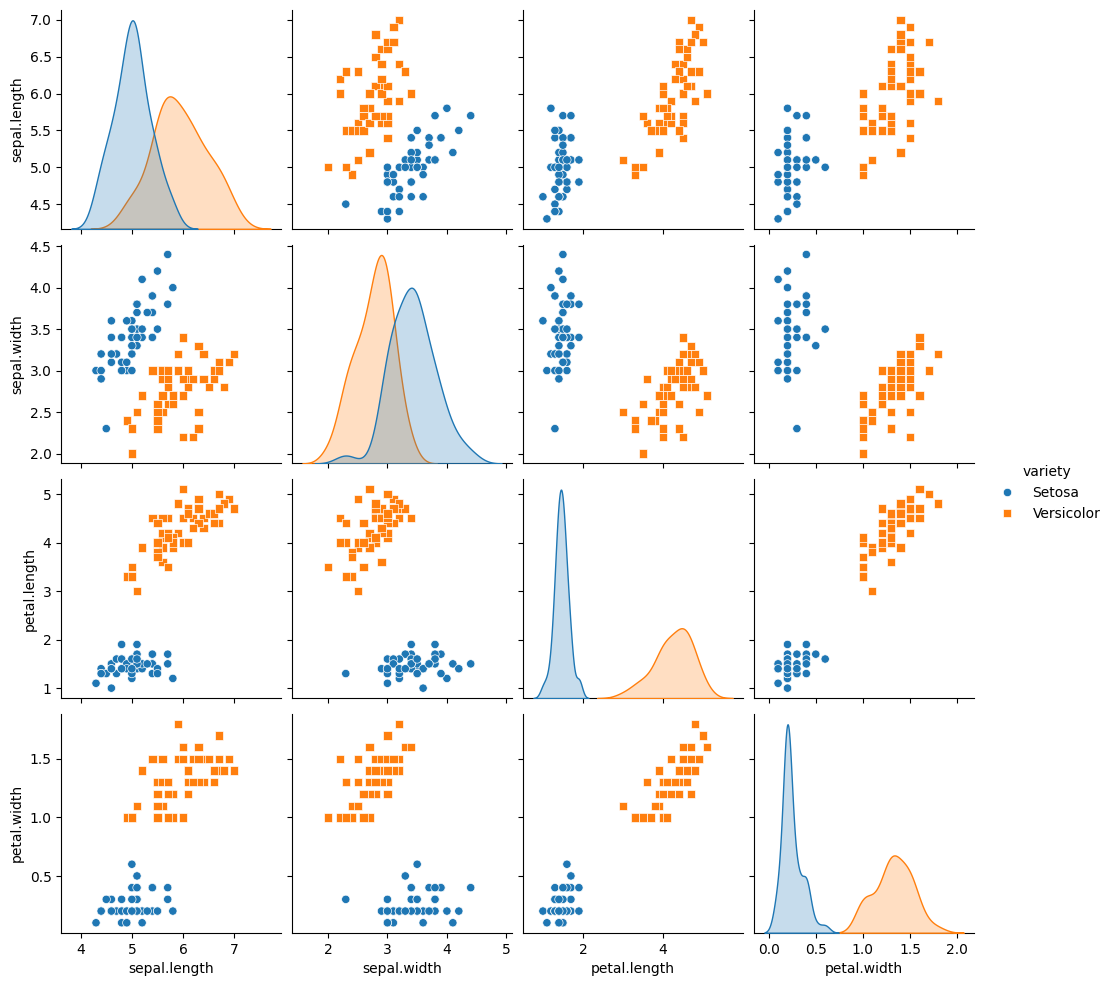

In [10]:
if __name__ == "__main__":
    main()

In [11]:
# Step 1: Load and preprocess the data
data = load_data()

# Step 2: Split features and target
X, y = split_features_target(data)

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = split_train_test(X, y)

# Step 4: Train the model using gradient descent
theta = gradient_descent(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_continuous = predict_manual(X_test, theta)

# Step 6: Apply the decision threshold to get back the class labels
y_pred_class = apply_threshold(y_pred_continuous)

# Step 7: Evaluate the model
evaluate_model(y_test, y_pred_class)

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64
Epoch 0, Cost: 0.02498241530056626
Epoch 100, Cost: 0.02126486547001448
Epoch 200, Cost: 0.020450898182530652
Epoch 300, Cost: 0.019759100366541063
Epoch 400, Cost: 0.01916486282016512
Epoch 500, Cost: 0.018649936530204466
Epoch 600, Cost: 0.01819963583924137
Epoch 700, Cost: 0.017802137981745913
Epoch 800, Cost: 0.017447921280311286
Epoch 900, Cost: 0.017129313682197302
Accuracy: 1.0
Confusion Matrix:
[[12  0]
 [ 0  8]]
Classification Report:
              precision    recall  f1-score   support

          

In [12]:
theta

array([[ 1.41789527],
       [-0.1042009 ],
       [-0.32300026],
       [ 0.02894896],
       [ 0.73655898]])

theta

In [13]:
#try to visualise the regression plane
import plotly.graph_objects as go
import numpy as np

def plot_decision_boundary_3d(X, y, theta, feature_indices, feature_names, title):
    """
    绘制 3D 交互式决策边界图
    X: 输入的特征矩阵
    y: 目标标签
    theta: 模型的权重参数 (5 个参数)
    feature_indices: 使用的两个特征的索引 (如 [0, 1] 或 [2, 3])
    feature_names: 特征名称列表
    title: 图像的标题
    """
    # 将 X 转为 NumPy 数组
    X_np = X.values if hasattr(X, 'values') else X
    y_np = y.values if hasattr(y, 'values') else y

    # 选择用于可视化的两个特征
    X_selected = X_np[:, feature_indices]

    # 创建网格用于绘制决策边界
    x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
    y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

    # 根据选择的特征索引，获取对应的权重
    if feature_indices == [0, 1]:
        w1, w2, b = theta[1], theta[2], theta[0]
    else:
        w1, w2, b = theta[3], theta[4], theta[0]

    # 计算网格上的预测值
    Z = w1 * xx + w2 * yy + b

    # 创建 3D 散点图
    fig = go.Figure()

    # 绘制训练数据的 3D 散点图
    fig.add_trace(go.Scatter3d(
        x=X_selected[:, 0],
        y=X_selected[:, 1],
        z=y_np,
        mode='markers',
        marker=dict(size=5, color=y_np, colorscale='Viridis', opacity=0.8),
        name='Training Data'
    ))

    # 绘制决策平面
    fig.add_trace(go.Surface(
        x=xx,
        y=yy,
        z=Z,
        opacity=0.5,
        colorscale='reds',
        name='Decision Boundary'
    ))

    # 设置图像布局
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title=feature_names[0],
            yaxis_title=feature_names[1],
            zaxis_title='Target Value (y)',
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    # 显示图像
    fig.show()

# 调用 3D 可视化函数，分别绘制两张图
plot_decision_boundary_3d(X_train, y_train, theta, [0, 1], ['Sepal Length', 'Sepal Width'], 'Decision Boundary for Sepal Features')
plot_decision_boundary_3d(X_train, y_train, theta, [2, 3], ['Petal Length', 'Petal Width'], 'Decision Boundary for Petal Features')


In [14]:
X,y

(    sepal.length  sepal.width  petal.length  petal.width
 0            5.1          3.5           1.4          0.2
 1            4.9          3.0           1.4          0.2
 2            4.7          3.2           1.3          0.2
 3            4.6          3.1           1.5          0.2
 4            5.0          3.6           1.4          0.2
 ..           ...          ...           ...          ...
 95           5.7          3.0           4.2          1.2
 96           5.7          2.9           4.2          1.3
 97           6.2          2.9           4.3          1.3
 98           5.1          2.5           3.0          1.1
 99           5.7          2.8           4.1          1.3
 
 [100 rows x 4 columns],
 0     0
 1     0
 2     0
 3     0
 4     0
      ..
 95    1
 96    1
 97    1
 98    1
 99    1
 Name: variety, Length: 100, dtype: int64)